In [ ]:
!pip install pennylane

In [56]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Definimos el tamaño del problema
numeroUsuarios = 2
numeroVoluntarios = 3
distancia = [[0 for i in range(numeroUsuarios)] for j in range(numeroVoluntarios)]
peticionUsuarios = np.random.randint(0, 2, numeroUsuarios)
peticionVoluntarios = np.random.randint(0, 2, numeroVoluntarios)
for i in range(0, numeroVoluntarios):
  for j in range(0, numeroUsuarios):
    distancia[i][j] = np.random.randint(5, 500)

In [32]:
print(distancia)

[[88, 256], [236, 93], [93, 420]]


In [52]:
def matrizObjetivo():
  objetivo = [[0 for i in range(numeroVoluntarios)] for j in range(numeroVoluntarios)]
  for i in range(0, numeroVoluntarios):
    for j in range(0, numeroUsuarios):
      if peticionVoluntarios[i]*peticionUsuarios[j] == 1:
        objetivo[i][j] = distancia[i][j]
  return objetivo

In [34]:
dev = qml.device("default.qubit", wires = range(numeroVoluntarios))

In [35]:
def U_C(gamma, h, n):
  for k in range(n):
    qml.RZ(-2 * (-6) * gamma, wires = k)
    for l in range(n):
      qml.RZ(-2 * (h[k][l]) * gamma, wires = l)
      for j in range(l+1, n):
          qml.CNOT(wires = [l, j])
          qml.RZ(-2 * (-h[k][l] * h[k][j]) * gamma, wires = j)
          qml.CNOT(wires = [l, j])

In [36]:
def U_B(beta, n):
  for k in range(n):
    qml.RX(-2 * beta, wires = k)

In [37]:
@qml.qnode(dev)
def circuito(gamma, beta, h, n, capas):
  for k in range(n):
    qml.Hadamard(wires = k)
  for k in range(capas):
    U_C(gamma, h, n)
    U_B(beta, n)
  return qml.probs(wires = range(n))

In [43]:
gamma = 0.15
beta = 0.15
capas = 3

In [58]:
print(matrizObjetivo())

[[88, 0, 0], [0, 0, 0], [93, 0, 0]]


<BarContainer object of 8 artists>

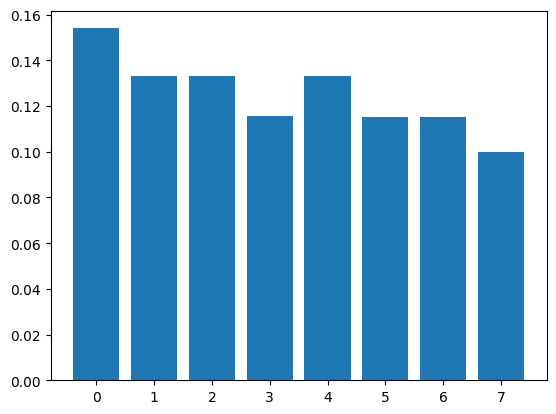

In [57]:
resultados = circuito(gamma, beta, matrizObjetivo(), numeroVoluntarios, capas)
plt.bar(range(2**numeroVoluntarios), resultados)